In [1]:
from mdagent import MDAgent
import os 

In [2]:
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_6_descriptive = get_prompt("descriptive", 6)
prompt_6_natural = get_prompt("natural", 6)

prompt_6_descriptive, prompt_6_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Simulate for 1ps at 300 K. 4. Compute the RMSD. 5. Compute the radius of gyration over time. 6. Compute the SASA (solvent accessible surface area).',
 'Simulate 1LYZ for 1ps at 300 K. Report the secondary structure assignments of the downloaded PDB structure, and compute the RMSD, SASA, and radius of gyration of the simulation.')

In [3]:
llm_model = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_6_descriptive)

Thought: First, I need to download the PDB file 1LYZ.
Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```
PDB file found with this ID: 1LYZ
Next, I need to report the secondary structure assignments of the downloaded PDB structure.
Action:
```
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1LYZ_102540",
    "top_file": "1LYZ_102540",
    "target_frames": "first"
  }
}
```Next, I need to simulate for 1ps at 300 K.
Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_102540",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
 

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_102540: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_102540
 rec0_102541: dssp values for trajectory with id: 1LYZ_102540
 1LYZ_102547: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_102551: Initial positions for simulation sim0_102551
 sim0_102551: Basic Simulation of Protein 1LYZ_102547
 rec0_102551: Simulation trajectory for protein 1LYZ_102547 and simulation sim0_102551
 rec1_102551: Simulation state log for protein 1LYZ_102547 and simulation sim0_102551
 rec2_102551: Simulation pdb frames for protein 1LYZ_102547 and simulation sim0_102551
 rmsd_102551: RMSD for 102551
 fig0_102559: RMSD plot for 102551
 rgy_rec0_102551: Radii of gyration per frame for rec0_102551
 fig0_102604: Plot of radii of gyration over time for rec0_102551
 sasa_sim0_102551: Total SASA values for sim0_102551
 fig0_102606: Plot of SASA over time fo

In [20]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_102540"))

In [21]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_102540", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [22]:
# make sure trajectory and topology exist
traj_path_1 = registry_1.get_mapped_path("rec0_102551")
top_path_1 = registry_1.get_mapped_path("top_sim0_102551")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)

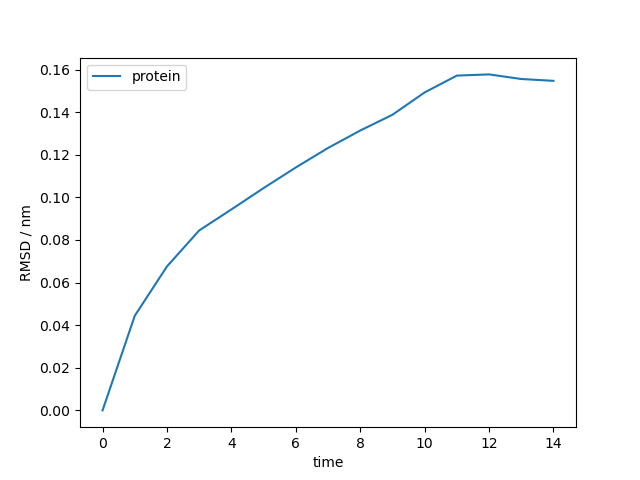

In [23]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_102559'))

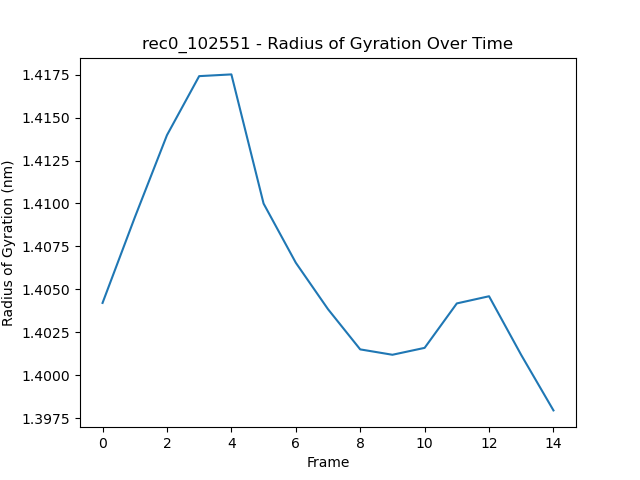

In [24]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_102604'))

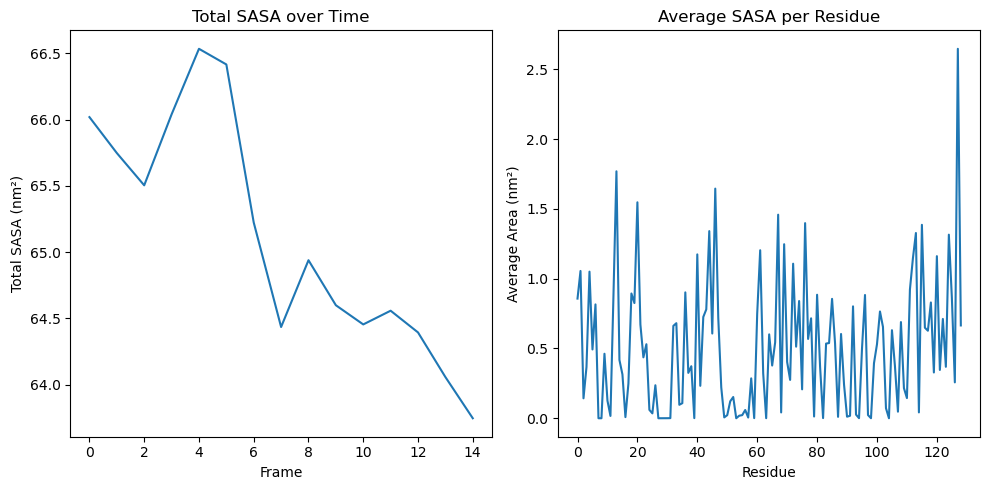

In [25]:
# make sure sasa plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_102606'))

In [12]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_6_natural)

Thought: First, I need to download the PDB file for 1LYZ. Then, I can use the downloaded file to set up and run a simulation for 1ps at 300 K. After the simulation, I can compute the secondary structure assignments, RMSD, SASA, and radius of gyration.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```
PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I can set up and run a simulation for 1ps at 300 K using the SetUpandRunFunction tool.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_102612",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [13]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_102612: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_102612
 1LYZ_102620: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_102624: Initial positions for simulation sim0_102624
 sim0_102624: Basic Simulation of Protein 1LYZ_102620
 rec0_102624: Simulation trajectory for protein 1LYZ_102620 and simulation sim0_102624
 rec1_102624: Simulation state log for protein 1LYZ_102620 and simulation sim0_102624
 rec2_102624: Simulation pdb frames for protein 1LYZ_102620 and simulation sim0_102624
 rec0_102632: dssp values for trajectory with id: rec0_102624
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_102635: RMSD plot for 1LYZ
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_102637: Plot of SASA over time for 1LYZ
 rgy_rec0_102624: Radii of gyration per frame for rec0_102624
 fig0_102640: Plot of radii of gyration over time for rec0_102624


In [26]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_102612"))

In [27]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_102612", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [28]:
# make sure trajectory and topology exist
traj_path_2 = registry_2.get_mapped_path("rec0_102624")
top_path_2 = registry_2.get_mapped_path("top_sim0_102624")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)

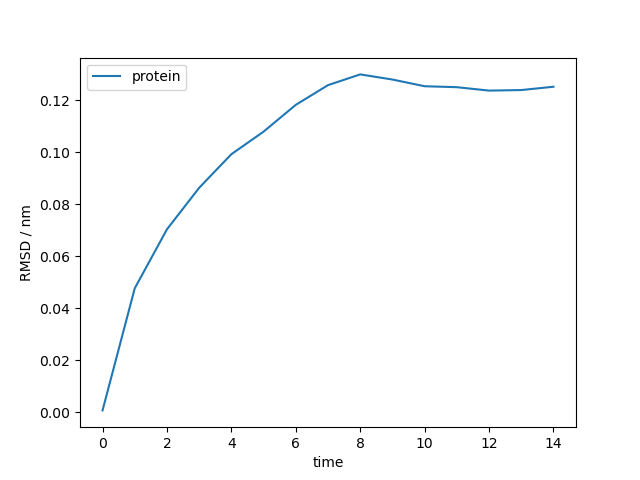

In [29]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_102635'))

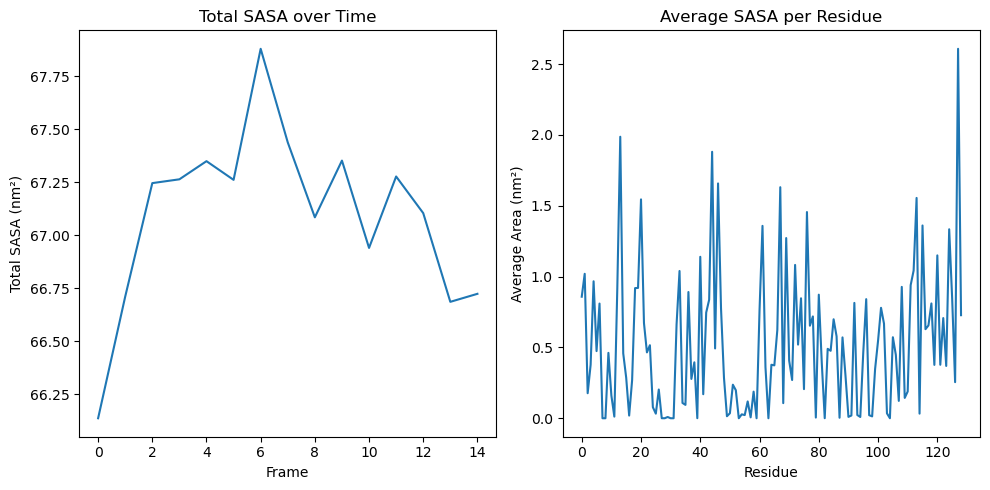

In [30]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_102637'))

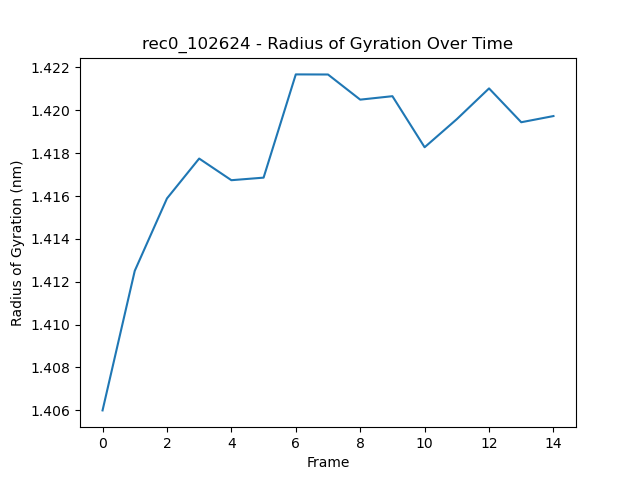

In [31]:
# make sure sasa plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_102640'))